## Part 1 — Perceptron from Scratch

### Q1. Dataset Preparation
1. Generate a **2D dataset** with 2 classes using `make_blobs` from scikit-learn.
2. Convert labels so that one class is `-1` and the other is `1`.
3. Visualize the dataset using a scatter plot.

**Your Task:**
- Write the code to generate and visualize the dataset.
- Provide the plot in your answer.


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [53]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=42)

In [54]:
y

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0])

In [55]:
y = np.where(y == 0, -1, 1)

In [56]:
y

array([ 1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,
       -1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,
       -1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,
        1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1,
        1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1,
        1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1])

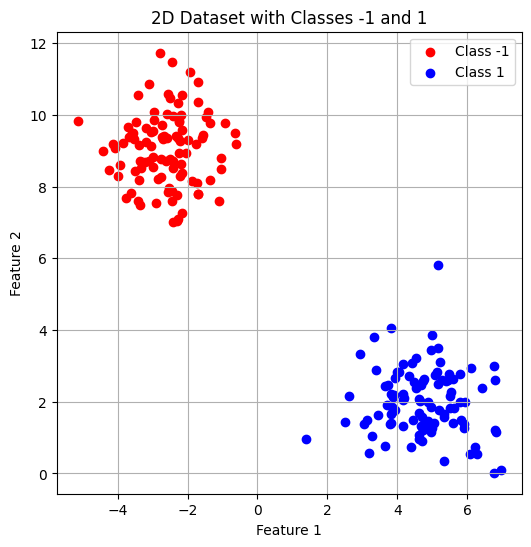

In [57]:
plt.figure(figsize=(6, 6))
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Dataset with Classes -1 and 1")
plt.legend()
plt.grid(True)
plt.show()

### Q2. Perceptron Implementation
1. Create a Python class `Perceptron` with:
   - `__init__` — initializes learning rate, number of epochs, and weights/bias.
   - `fit(X, y)` — trains the perceptron using the **Perceptron Learning Rule**.
   - `predict(X)` — returns predictions for given input features.
2. Use the update rule:  
$$
w \gets w + \eta (y_i - \hat{y}_i) x_i
$$
3. Train the Perceptron on your dataset.

**Your Task:**
- Implement and train the Perceptron.
- Display the final weights and bias.


In [58]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=100):
        self.lr = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_epochs):
            for idx, xi in enumerate(X):
                y_pred = np.sign(np.dot(xi, self.weights) + self.bias)
                if y_pred == 0:
                    y_pred = 1

                update = self.lr * (y[idx] - y_pred)
                self.weights += update * xi
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)


In [59]:
perceptron = Perceptron(learning_rate=0.1, n_epochs=10)
perceptron.fit(X, y)

In [60]:
print("Final Weights:", perceptron.weights)
print("Final Bias:", perceptron.bias)

Final Weights: [ 2.07106485 -1.37615797]
Final Bias: 0.0


### Q3. Decision Boundary
1. Write a function to plot the decision boundary of your trained perceptron.
2. Visualize the boundary along with the dataset.

**Your Task:**
- Provide the decision boundary plot.
- Explain in **2–3 sentences** how the perceptron separates the two classes.

In [61]:
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(6, 6))
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')

    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2 = -(model.weights[0] * x1 + model.bias) / model.weights[1]
    plt.plot(x1, x2, color='green', linestyle='--', label='Decision Boundary')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Perceptron Decision Boundary")
    plt.legend()
    plt.grid(True)
    plt.show()

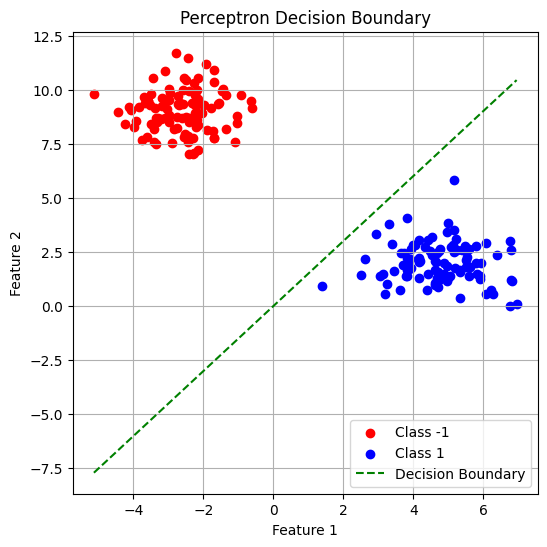

In [62]:
plot_decision_boundary(X, y, perceptron)

Perceptron creates a straight line which act as boundary to seperate the 2 classes.

Points of one class lie on the one side of the decision boundary and the others in the opposite direction of decision boundary.

Perceptron works by adjusting weights and biases iteratively  so that boundary is aligned in the correct direction.


## Part 2 — Activation Functions

### Q4. Activation Function Implementation
Implement the following activation functions and their derivatives:
- Sigmoid
- Tanh
- ReLU
- Leaky ReLU
- Softmax

**Your Task:**
- For each activation function:
  - Write the forward pass formula.
  - Write the derivative formula.

**Table: Activation Function Formulas & Derivatives**
| Function   | Formula | Derivative |
|------------|---------|------------|
| Sigmoid    |         |            |
| Tanh       |         |            |
| ReLU       |         |            |
| Leaky ReLU |         |            |
| Softmax    |         |            |


In [63]:
def sigmoid(x):
  return 1/(1+ np.exp(-x))

def sigmoid_der(x):
  s = sigmoid(x)
  return s*(s-1)

def tanh(x):
  return np.tanh(x)

def tanh_der(x):
  return 1 - np.tanh(x)**2

def relu(x):
  return np.maximum(0,x)

def relu_der(x):
  return np.where(x > 0,1,0)
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_der(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def softmax_der(softmax_output):
    s = softmax_output.reshape(-1, 1)
    return np.diagflat(s) - np.dot(s, s.T)

### Q5. Testing Activation Functions
1. Choose input values: `[-2, -1, 0, 1, 2]`.
2. Apply each activation function to these inputs.
3. Record the outputs in a table.

**Output Table:**
| Input | Sigmoid | Tanh | ReLU | Leaky ReLU | Softmax |
|-------|---------|------|------|------------|---------|
| -2    |         |      |      |            |         |
| -1    |         |      |      |            |         |
| 0     |         |      |      |            |         |
| 1     |         |      |      |            |         |
| 2     |         |      |      |            |         |

In [67]:
import pandas as pd

In [64]:
inputs = np.array([-2, -1, 0, 1, 2])

In [68]:
df = pd.DataFrame({
    "Input": inputs,
    "Sigmoid": np.round(sigmoid(inputs), 4),
    "Tanh": np.round(tanh(inputs), 4),
    "ReLU": np.round(relu(inputs), 4),
    "Leaky ReLU": np.round(leaky_relu(inputs), 4),
    "Softmax": np.round(softmax(inputs), 4)
})

print(df)

   Input  Sigmoid    Tanh  ReLU  Leaky ReLU  Softmax
0     -2   0.1192 -0.9640     0       -0.02   0.0117
1     -1   0.2689 -0.7616     0       -0.01   0.0317
2      0   0.5000  0.0000     0        0.00   0.0861
3      1   0.7311  0.7616     1        1.00   0.2341
4      2   0.8808  0.9640     2        2.00   0.6364


### Q6. Visualization of Activation Functions
1. Plot each activation function for input range `[-5, 5]`.
2. Compare their shapes visually.

**Your Task:**
- Provide the plots for all activation functions.
- In **3–4 sentences**, explain how the choice of activation function can affect learning in a neural network.


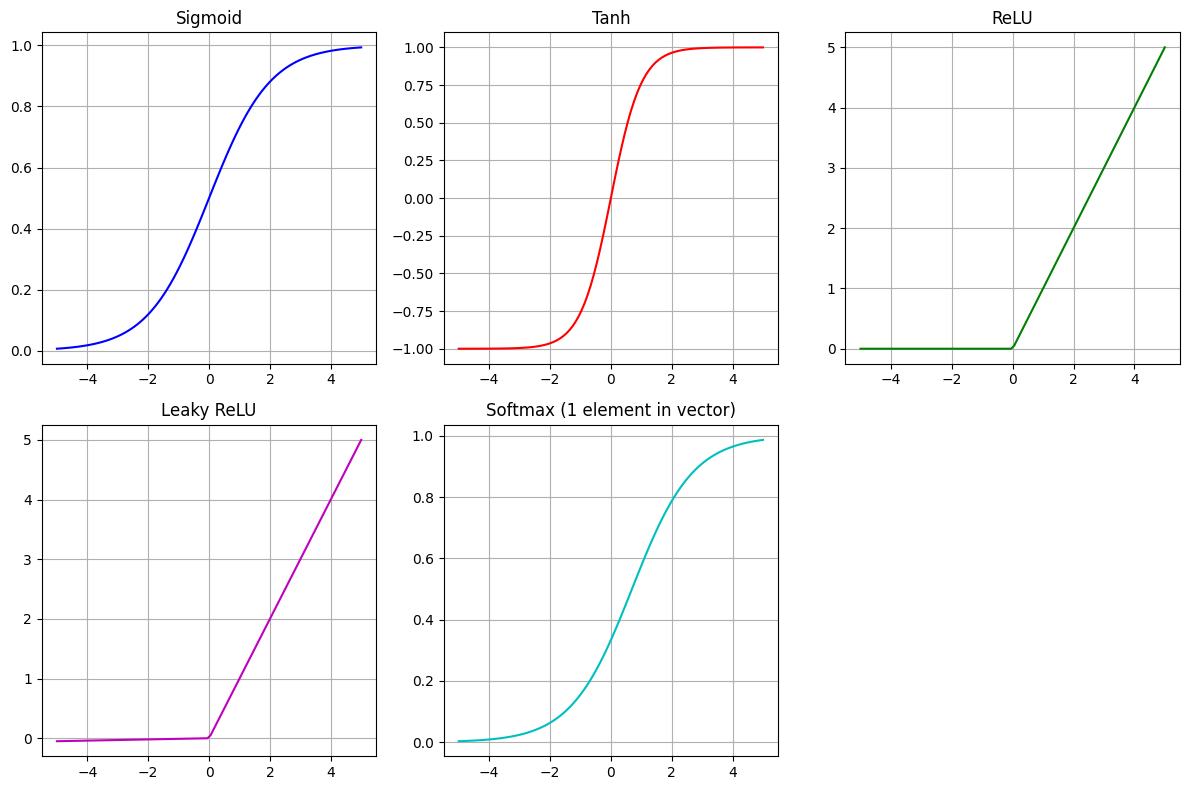

In [71]:
x = np.linspace(-5, 5, 100)
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)
y_leaky_relu = leaky_relu(x)
y_softmax = [softmax(np.array([i, 0, 0]))[0] for i in x]


plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(x, y_sigmoid, 'b')
plt.title("Sigmoid")
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(x, y_tanh, 'r')
plt.title("Tanh")
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(x, y_relu, 'g')
plt.title("ReLU")
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(x, y_leaky_relu, 'm')
plt.title("Leaky ReLU")
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(x, y_softmax, 'c')
plt.title("Softmax (1 element in vector)")
plt.grid(True)

plt.tight_layout()
plt.show()

**Explanation (3–4 sentences):**

The activation function decides how a neuron processes information, which affects how well the network learns patterns.

Sigmoid and Tanh can make learning slow in deep networks because gradients get very small.

ReLU trains faster but can sometimes stop some neurons from working.

Leaky ReLU fixes this by keeping a small output for negative inputs, and Softmax is used at the end to give probabilities for each class.
